<a href="https://colab.research.google.com/github/sunhuanhuan920/ECE1512_2023F_ProjectRepo_Zhenhuan_Sun/blob/main/Project%20A/Project_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Task 1: Knowledge Distillation in MNIST Dataset**

**Question 1**

(a). Transfer the knowledge from a large and cumbersome model to a model that is smaller and more suitable for deployment.

(b). The class probabilities produced by the cumbersome model.

(c).

\begin{equation}
\lim_{T \to \infty} \frac{\exp(z_i / T)}{\sum_j \exp(z_j / T)} = \frac{\exp(0)}{\sum_j \exp(0)} = \frac{1}{K}
\end{equation}

where $K$ denotes the number of classes. Thus, from this we can see that $T$ is a scaling factor that will make the probability distribution acorss all classes become closer to a uniform distribution.

We use $T$ to soften the probability distribution over classes, and capture and amplify nuanced information that cannot be captured by hard targets, such as one-hot vector.

By using a large value of $T$, the relative probabilities between classes become more discernible. From which, subtle information (knowledge), such as how the teacher model perceives the difference between classes and what mistakes the teacher model is more likely to make, can be acquired and utilized during knowledge distillation.

(d). The loss function comprises two parts, the first part, which is called distillation loss, uses cross entropy to measure the difference between the student's softened probability distribution and the teacher's softened probability distribution over all classes. The second part, which is sometimes referred as classification loss, uses cross entropy to measure the difference between student model's unsoftened ($T = 1$) predicted probability of different classes and the true class probability, e.g., one-hot vector. A weight parameter, i.e.,task balance parameter, is introduced to combined the distillation loss and classification loss as a weighted sum of these two losses. In addition, the distillation loss is scaled by factor of $T^2$ in the weighted sum to compensate for the gradient's down scale by a factor of $1/T^2$ due to the present of $T$ in the softmax function.

The task balance parameter governs the relative contribution of distillation loss and classification loss in the overall kownledge distillation process. When this parameter equals to 1, the student model focuses on distillation and is trained only using the kownledge from the teacher. When this prameter equals to 0, the student model is trained regularly. By adjusting this parameter between $0$ and $1$, we can control how much of the teacher model's knowledge versus the acutal data we want the student to focus on during its training.

(e). The use of soft targets allows student model to account for the relative probabilites of different classes in the teacher model's output and have a deeper understanding of how teacher model generalizes. Thus, by performing knowledge distillation from teacher model to student model, we are essentially letting teacher model to teach student model how to generalize well, which is equivalent to the effect of regularization.

**Question 2**

**Load Dataset**

In [ ]:
# import tensorflow.compat.v2 as tf
import tensorflow as tf
import tensorflow_datasets as tfds
from typing import Union

# tf.enable_v2_behavior()

builder = tfds.builder('mnist')
BATCH_SIZE = 256
NUM_EPOCHS = 12
NUM_CLASSES = 10  # 10 total classes.

# Load train and test splits.
def preprocess(x):
  image = tf.image.convert_image_dtype(x['image'], tf.float32)
  subclass_labels = tf.one_hot(x['label'], builder.info.features['label'].num_classes)
  return image, subclass_labels


mnist_train = tfds.load('mnist', split='train', shuffle_files=False).cache()
mnist_train = mnist_train.map(preprocess)
mnist_train = mnist_train.shuffle(builder.info.splits['train'].num_examples)
mnist_train = mnist_train.batch(BATCH_SIZE, drop_remainder=True)

mnist_test = tfds.load('mnist', split='test').cache()
mnist_test = mnist_test.map(preprocess).batch(BATCH_SIZE)

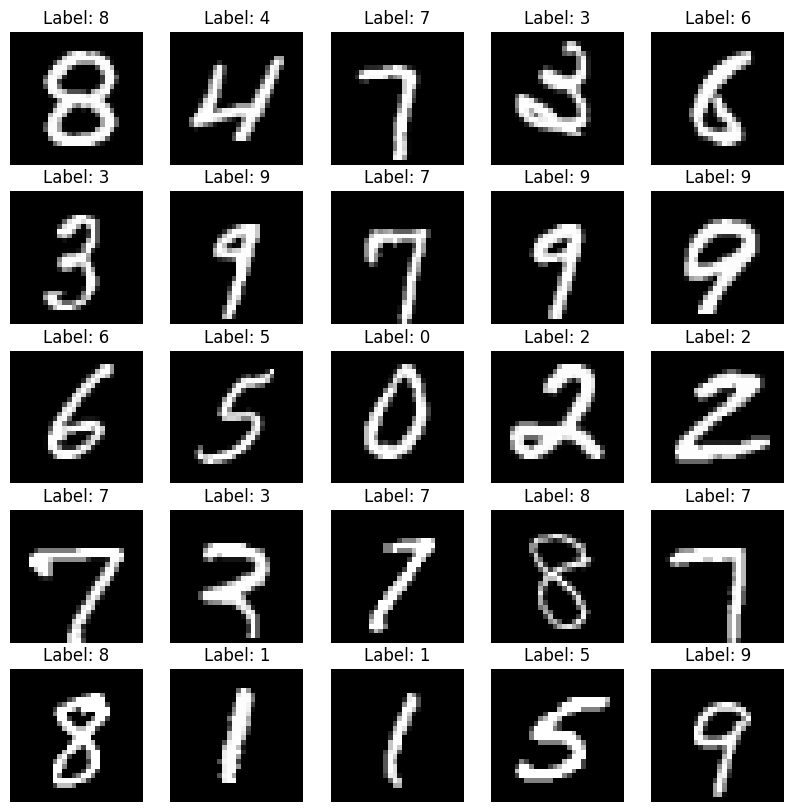

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Take one batch from mnist_train
for images, labels in mnist_train.take(1):
    plt.figure(figsize=(10, 10))
    # Visualize the first 25 images from the batch
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title('Label: %d' % tf.argmax(labels[i]))
        plt.axis('off')
    plt.show()

# **Task 2: Knowledge Distillation in MHIST Dataset**